# CDS 503 Machine Learning Individual Assignment

Student Name: Goh Man Fye
<br>Student ID: P-COM0084/19
<br>Dataset: Hepatitis Domain Dataset

# Introduction
Hepatitis is an inflammation of the liver. The condition can be self-limiting or can progress to fibrosis (scarring), cirrhosis or liver cancer. Hepatitis viruses are the most common cause of hepatitis in the world but other infections, toxic substances (e.g. alcohol, certain drugs), and autoimmune diseases can also cause hepatitis. [1]
<br><br>There are 5 main hepatitis viruses, referred to as types A, B, C, D and E. These 5 types are of greatest concern because of the burden of illness and death they cause and the potential for outbreaks and epidemic spread. Types B and C lead to chronic disease in hundreds of millions of people and, together, are the most common cause of liver cirrhosis and cancer. [1]
<br><br>Majority of hepatitis patients often asymptomatic, often physician diagnose the disease with laboratory test such as liver function test, prothrombin time test, histology test or by physical examination of the patients. [2]
<br><br>The objective of this project is to create a predictive model which can help physician to identify the prognosis and survivability of hepatitis patients based on the health features given. Thus, early intervention can be done to prevent the death of patient.  


# Import Libraries and Exploratory Data Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
df = pd.read_csv("hepatitis.data")

In [3]:
df.shape

(154, 20)

In [4]:
columNames=['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

In [5]:
df = pd.read_csv("hepatitis.data", names=columNames)

In [6]:
df.head(5)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [7]:
df.replace("?",np.nan, inplace = True)
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [8]:
df_ori = df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null int64
AGE                155 non-null int64
SEX                155 non-null int64
STEROID            154 non-null object
ANTIVIRALS         155 non-null int64
FATIGUE            154 non-null object
MALAISE            154 non-null object
ANOREXIA           154 non-null object
LIVER BIG          145 non-null object
LIVER FIRM         144 non-null object
SPLEEN PALPABLE    150 non-null object
SPIDERS            150 non-null object
ASCITES            150 non-null object
VARICES            150 non-null object
BILIRUBIN          149 non-null object
ALK PHOSPHATE      126 non-null object
SGOT               151 non-null object
ALBUMIN            139 non-null object
PROTIME            88 non-null object
HISTOLOGY          155 non-null int64
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


In [10]:
numerical_variables = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK PHOSPHATE', 'SGOT']

# Handling of missing data
Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model’s quality. Some algorithms such as KNN assume that all values are numerical and have and hold meaningful value.
<br>2 Strategy had been adopted to handle the missing data.
<br>a)	Imputation with mean value for continuous variables
<br>b)	Imputation with most frequent value for categorical variables


In [11]:
df["BILIRUBIN"] = df.BILIRUBIN.astype(float)
df["PROTIME"] = df.PROTIME.astype(float)
df["ALK PHOSPHATE"] = df["ALK PHOSPHATE"].astype(float)
df["SGOT"] = df.SGOT.astype(float)
df["ALBUMIN"] = df.ALBUMIN.astype(float)

In [12]:
df[numerical_variables].dtypes

AGE                int64
BILIRUBIN        float64
PROTIME          float64
ALBUMIN          float64
ALK PHOSPHATE    float64
SGOT             float64
dtype: object

In [13]:
df[numerical_variables].describe()

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK PHOSPHATE,SGOT
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [14]:
df[numerical_variables].fillna(df[numerical_variables].mean()).head(5)

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK PHOSPHATE,SGOT
0,30,1.0,61.852273,4.0,85.000000,18.0
1,50,0.9,61.852273,3.5,135.000000,42.0
2,78,0.7,61.852273,4.0,96.000000,32.0
3,31,0.7,80.000000,4.0,46.000000,52.0
4,34,1.0,61.852273,4.0,105.325397,200.0


In [15]:
categorical_variables = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE',
'SPIDERS','ASCITES','VARICES', 'HISTOLOGY']
df[categorical_variables].apply(pd.Series.value_counts)


,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
1,139.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
2,16.0,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
1,NaN,76.0,NaN,100.0,61.0,32.0,25.0,60.0,30.0,51.0,20.0,18.0,NaN
2,NaN,78.0,NaN,54.0,93.0,122.0,120.0,84.0,120.0,99.0,130.0,132.0,NaN


In [16]:
#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp_mean.fit(df_ori)
imputed_train_df = imp_mean.transform(df_ori)

In [17]:
imputedDf = pd.DataFrame(imputed_train_df,columns=columNames)

In [18]:
imputedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null object
AGE                155 non-null object
SEX                155 non-null object
STEROID            155 non-null object
ANTIVIRALS         155 non-null object
FATIGUE            155 non-null object
MALAISE            155 non-null object
ANOREXIA           155 non-null object
LIVER BIG          155 non-null object
LIVER FIRM         155 non-null object
SPLEEN PALPABLE    155 non-null object
SPIDERS            155 non-null object
ASCITES            155 non-null object
VARICES            155 non-null object
BILIRUBIN          155 non-null object
ALK PHOSPHATE      155 non-null object
SGOT               155 non-null object
ALBUMIN            155 non-null object
PROTIME            155 non-null object
HISTOLOGY          155 non-null object
dtypes: object(20)
memory usage: 24.3+ KB


In [19]:
imputedDf.count()

Class              155
AGE                155
SEX                155
STEROID            155
ANTIVIRALS         155
FATIGUE            155
MALAISE            155
ANOREXIA           155
LIVER BIG          155
LIVER FIRM         155
SPLEEN PALPABLE    155
SPIDERS            155
ASCITES            155
VARICES            155
BILIRUBIN          155
ALK PHOSPHATE      155
SGOT               155
ALBUMIN            155
PROTIME            155
HISTOLOGY          155
dtype: int64

In [20]:
imputedDf[categorical_variables].apply(pd.Series.value_counts)

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
1,139.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
2,16.0,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
1,NaN,76.0,NaN,101.0,61.0,32.0,25.0,60.0,30.0,51.0,20.0,18.0,NaN
2,NaN,79.0,NaN,54.0,94.0,123.0,130.0,95.0,125.0,104.0,135.0,137.0,NaN


In [21]:
imputedDf[categorical_variables] = imputedDf[categorical_variables].astype(int)

In [22]:
imputedDf[categorical_variables].apply(pd.Series.value_counts)

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
1,139,76,24,101,61,32,25,60,30,51,20,18,85
2,16,79,131,54,94,123,130,95,125,104,135,137,70


In [23]:
imputedDf.describe()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,1.451613
std,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,0.499266
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [24]:
imputedDf["Class"] = imputedDf["Class"].astype(int)

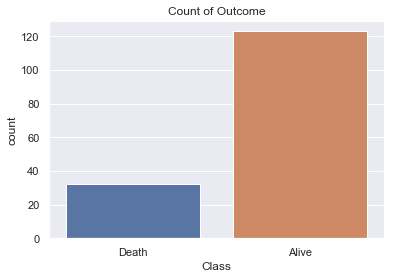

In [25]:
class_count=sns.countplot(x="Class", data=imputedDf)
plt.gca().set_xticklabels(['Death','Alive']);
class_count.set_title("Count of Outcome")
class_count.figure.savefig('class_count.png')


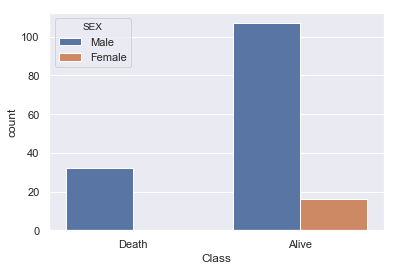

In [26]:
class_count=sns.countplot(x="Class",hue="SEX", data=imputedDf)
plt.gca().set_xticklabels(['Death','Alive']);
plt.legend(title='SEX', loc='upper left', labels=['Male', 'Female'])
plt.show(class_count)

# Covariance matrix for feature selection

In [27]:
corrmat = imputedDf.corr(method ='spearman')

In [28]:
corrmat["Class"]

Class              1.000000
SEX                0.173051
STEROID            0.137413
ANTIVIRALS        -0.130196
FATIGUE            0.306049
MALAISE            0.339530
ANOREXIA           0.133638
LIVER BIG         -0.093665
LIVER FIRM         0.020057
SPLEEN PALPABLE    0.234261
SPIDERS            0.389137
ASCITES            0.469334
VARICES            0.362385
HISTOLOGY         -0.337856
Name: Class, dtype: float64

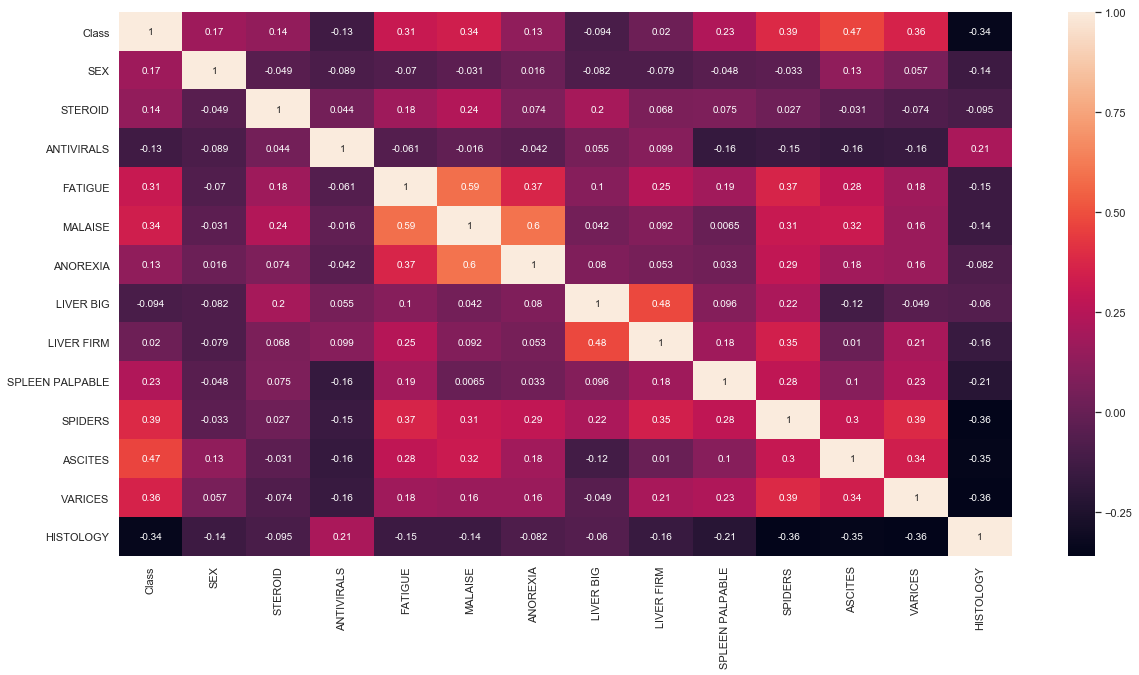

In [29]:
plt.figure(figsize=(20,10))
g=sns.heatmap(corrmat,annot=True)
g.figure.savefig('g.png')

In [30]:
imputedDf[numerical_variables] = imputedDf[numerical_variables].astype(float)

In [31]:
numerical_class = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK PHOSPHATE', 'SGOT','Class']

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


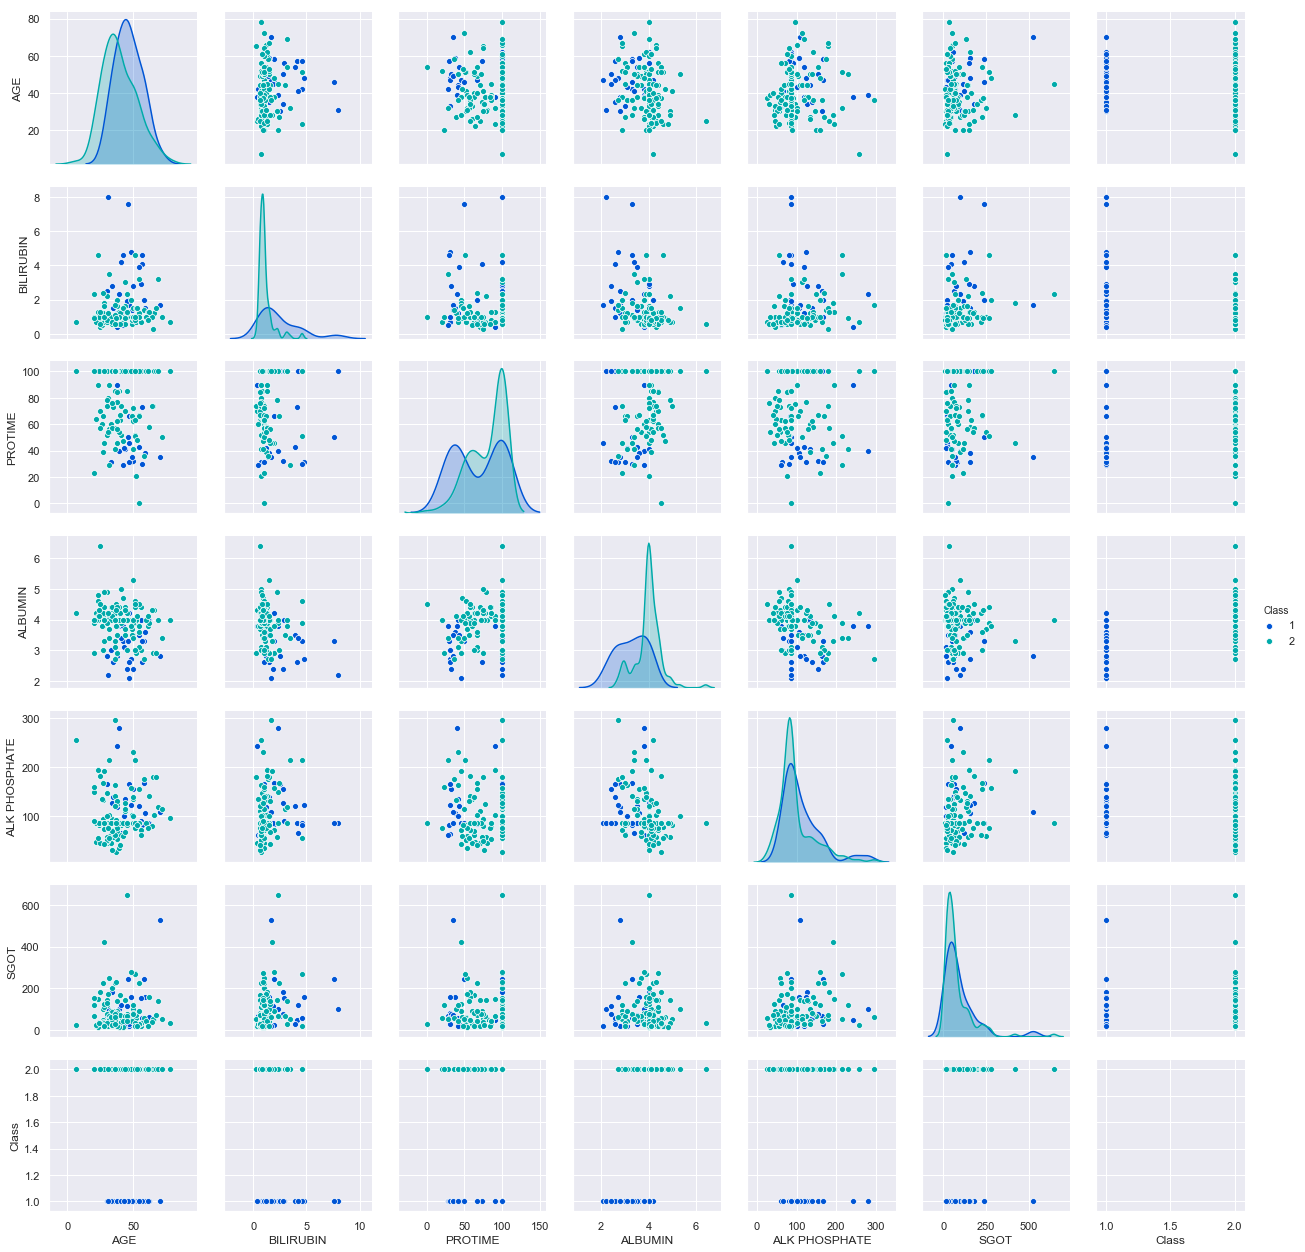

In [32]:
pairplot = sns.pairplot(imputedDf[numerical_class] ,hue="Class",palette='winter')
plt.show(pairplot)

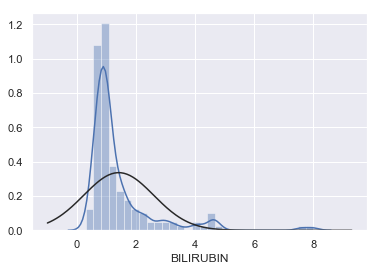

In [33]:
ax = sns.distplot(imputedDf["BILIRUBIN"], fit=stats.norm, kde=True)

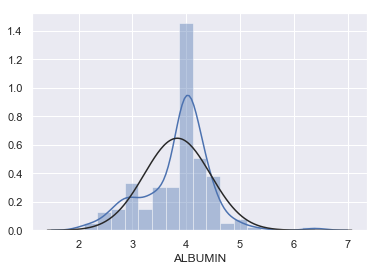

In [34]:
sns.distplot(imputedDf['ALBUMIN'], fit=stats.norm, kde=True);

# Feature Engineering 
a) Standard Scalar<br>
Standardizing the scale is important in a machine learning model, especially with classifier such as K nearest neighbor. If a feature’s variance is orders of magnitude more than the variance of other features, that feature might dominate other features in the dataset, which is not something we want happening in our model. In this dataset, standard scalar of sci-kit learn is adopted to standardize the scale within the dataset.

b) SMOTE balance training data
<br>
As mentioned in section 2.0, the dataset consists of imbalance data class, random splitting of training and test set produced an unequally distributed class outcome as figure 2. It is imbalance as alive patient consist of 71 patient and death patient is 22. I applied SMOTE technique to balance the data using imblearn library as shown in figure 3. I will then compare the model accuracy with and without SMOTE in the following section.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report,confusion_matrix

sc=StandardScaler()
sc.fit(imputedDf.drop(["Class","PROTIME","BILIRUBIN"], axis = 1))
scaled_features = sc.transform(imputedDf.drop(["Class","PROTIME","BILIRUBIN"], axis = 1))
X =scaled_features
y = imputedDf["Class"] 

# Classification on survived 'class' (target attribute) print(y) # Split dataset in training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=3)

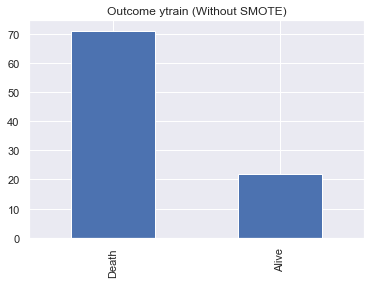

In [36]:
class_nobalance = pd.Series(y_train).value_counts().plot.bar()
class_nobalance.set_title("Outcome ytrain (Without SMOTE)")
plt.gca().set_xticklabels(['Death','Alive']);
class_nobalance.figure.savefig('class_nobalance.png')

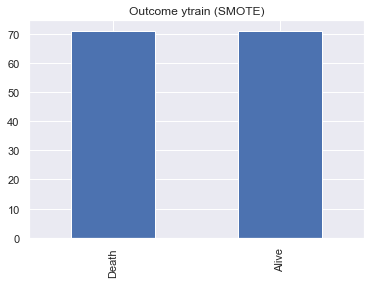

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())
class_balance = pd.Series(y_train_new).value_counts().plot.bar()
class_balance.set_title("Outcome ytrain (SMOTE)")
plt.gca().set_xticklabels(['Death','Alive']);
class_balance.figure.savefig('class_balance.png')

# Machine Learning Classifier
Create a scoreDF to store the performance of each classifier

In [40]:
from sklearn.model_selection import cross_validate

scoreDF = pd.DataFrame(columns=['accuracy','f1','recall',"roc_auc","type","balance"])

# Naive Bayes
A Naive Bayes classifier corresponds to a Bayesian network. Naïve Bayes classifier is a relatively simple algorithm to understand and build. It is faster to predict classes using this algorithm than many other classification algorithms. Last, it can easily train using a small dataset.[5]
<br><br>
As our dataset consist of multiple features of continuous and categorical variables and is relatively small, Naïve Bayes classifier is a better choice compare to other non-parametric classifier such as simple neural network which require large dataset and logistic regression which is discriminative in nature. Logistic regression tends to overfit when training with small data set.[6]


In [41]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 
gnb = GaussianNB()
gnb.fit(X_train,y_train)

# Test the classifier 
gnbpredict = gnb.predict(X_test)
# Print results 

score = cross_validate(gnb, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"NaiveB","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );

#print(metrics.accuracy_score(y_test,gnbpredict))

gnb = GaussianNB()
gnb.fit(X_train_new,y_train_new)

# Test the classifier 
gnbpredict = gnb.predict(X_test)

score = cross_validate(gnb, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))

data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"NaiveB","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );


Test accuracy:0.5712121212121212
Test accuracy:0.8178571428571428


# Support Vector Machine (SVM)
SVMs are a set of related supervised learning methods used for classification and regression. They belong to a family of generalized linear classification. SVM map input vector to a higher dimensional space where a maximal separating hyperplane is constructed. Two parallel hyperplanes are constructed on each side of the hyperplane that separates the data. The separating hyperplane is a hyperplane that maximizes the distance between the two parallel hyperplanes. 
<br><br>
SVM take cares of outliers better than KNN and outperform KNN when there are large features and lesser training data. In this project, we will use select the best performance kernel.
<br><br>
Testing with multiple kernal follow by actual test

In [43]:
from sklearn.svm import SVC

svc_model1 = SVC(kernel="poly", C=1,gamma="auto")
svc_model2 = SVC(kernel="rbf", C=1,gamma="auto")
svc_model3 = SVC(kernel="sigmoid", C=1,gamma="auto")
svc_model4 = SVC(kernel="linear", C=1,gamma="auto")

score = cross_validate(svc_model1, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of Poly Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model2, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of rbf Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model3, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of sigmoid Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model4, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of linear Kernal:{}".format(score["test_accuracy"].mean()))

Test accuracy of Poly Kernal:0.8875000000000002
Test accuracy of rbf Kernal:0.9223214285714286
Test accuracy of sigmoid Kernal:0.8669642857142857
Test accuracy of linear Kernal:0.8803571428571428


In [45]:
svc=SVC(kernel="rbf",gamma="auto", C=1) # The default kernel used by SVC is the gaussian kernel
svc.fit(X_train, y_train)
SVMprediction = svc.predict(X_test)

score = cross_validate(svc, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );


svc.fit(X_train_new,y_train_new)
SVMprediction = svc.predict(X_test)

score = cross_validate(svc, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))

data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );


Test accuracy:0.8477777777777776
Test accuracy:0.9223214285714286


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN Classifier
The k-nearest neighbors (KNN) algorithm is a simple, unsupervised machine learning algorithm that can be used to solve both classification and regression problems. It’s easy to implement and understand but has a major drawback of becoming significantly slows as the size of that data in use grows. KNN has an effectiveness on small data compare to decision tree classifier which is a supervised machine learning algorithm.[8] In this project, I will fine tune the K value to achieve a better accuracy of the model.
<br><br>
Finding the optimal K value follow by actual test

The optimal number of neighbors [unbalance dataset] is 6
The optimal score is 0.87


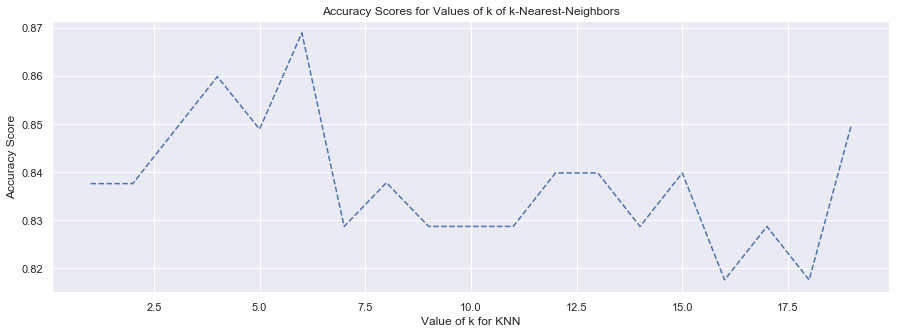

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores=[]
lrange=list(range(1,20))
for k in lrange:
# input the k value and 'distance' measure 
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')

    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors [unbalance dataset] is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

The optimal number of neighbors [balance dataset] is 1
The optimal score is 0.93


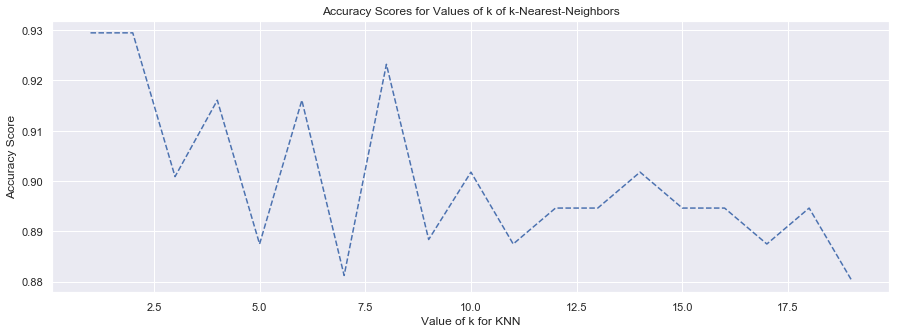

In [49]:
scores=[]
lrange=list(range(1,20))
for k in lrange:
# input the k value and 'distance' measure 
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')

    score = cross_val_score(knn, X_train_new, y_train_new, cv=10, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors [balance dataset] is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

score = cross_validate(knn, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"KNN","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );

#print(metrics.accuracy_score(y_test,knnpred))

knn.fit(X_train_new,y_train_new)
knnpred = knn.predict(X_test)

score = cross_validate(knn, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))

data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"KNN","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );

Test accuracy:0.8375757575757576
Test accuracy:0.9294642857142857


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Performance Evaluation

In [51]:
scoreDF

,accuracy,f1,recall,roc_auc,type,balance
0,0.571212,0.462107,0.800000,0.788095,NaiveB,No
1,0.817857,0.832500,0.917857,0.909534,NaiveB,Yes
2,0.847778,0.597143,0.566667,0.859524,SVC,No
3,0.922321,0.924402,0.942857,0.974904,SVC,Yes
4,0.847778,0.597143,0.566667,0.859524,SVC,No
5,0.922321,0.924402,0.942857,0.974904,SVC,Yes
6,0.837576,0.621667,0.666667,0.776190,KNN,No
7,0.929464,0.935784,0.985714,0.929464,KNN,Yes


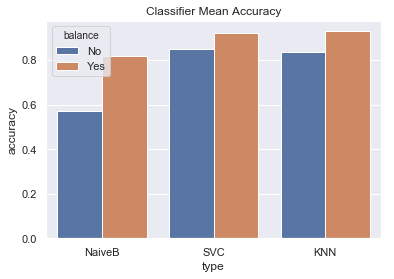

In [52]:
accuracyPlot = sns.barplot(x='type',y='accuracy',data=scoreDF, hue="balance")
accuracyPlot.set_title("Classifier Mean Accuracy")
accuracyPlot.figure.savefig('accuracyPlot.png')

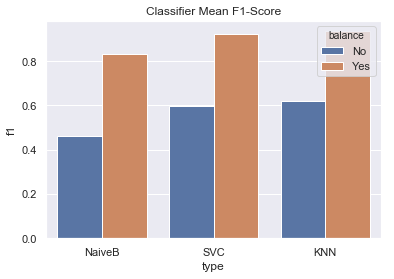

In [53]:
f1Plot = sns.barplot(x='type',y='f1',data=scoreDF, hue="balance");
f1Plot.set_title("Classifier Mean F1-Score")
f1Plot.figure.savefig('f1Plot.png')

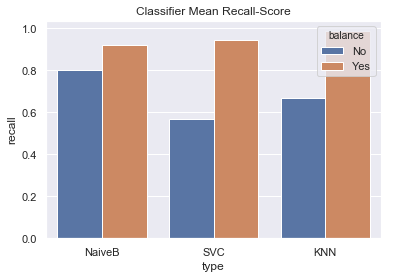

In [54]:
recallPlot = sns.barplot(x='type',y='recall',data=scoreDF, hue="balance");
recallPlot.set_title("Classifier Mean Recall-Score")
recallPlot.figure.savefig('recallPlot.png')

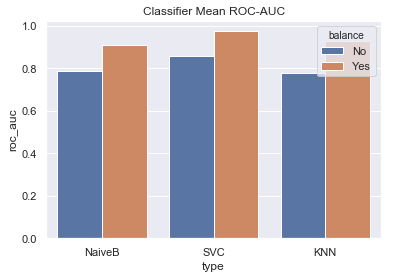

In [55]:
rocPlot = sns.barplot(x='type',y='roc_auc',data=scoreDF, hue="balance");
rocPlot.set_title("Classifier Mean ROC-AUC")
rocPlot.figure.savefig('rocPlot.png')

Result obtain from the classifier is shown in table 1, all results are very promising as the obtained accuracies are above 80% with AUC above 90%. The average AUC for SVM is the highest where is cover 97.4% where KNN averaged at 92.9% and Naïve Bayers lowest at 90.9%. The accuracy of KNN is the highest which is 92.9% while SVM is at 92.2% and Naïve Bayers is at 81.7%. The KNN classifier had the highest recall at 0.99 while SVM have 0.94 and Naïve Bayers at 0.92. 
<br><br>
Overall performance of SVM and KNN are equally good with SVM have a higher AUC. Naïve Bayers have lower performance with acceptable accuracy, it is however due to the dataset is relatively small, further evaluation is needed if there is changes in the dataset size or features.
<br><br>
Another interesting point of this project is that classifier trained with balanced data produce better result than classifier trained with unbalanced data. A more significant example can be seen in Naïve Bayers classifier where unbalanced training set produce a result of 57.1% accuracy while balanced dataset produces 81.7% accuracy.
